Notebook for building analysis of resulting synapse distribution

In [1]:
import os
import sys
sys.path.append("../")
sys.path.append("../Modules/")
import pandas as pd
import h5py

from Modules import analysis

In [5]:
sim_directory = "/home/drfrbc/Neural-Modeling/scripts/2024-12-17-16-16-39-ZiaoSynapses_final_detailed_syn_dist_analysis/Complex_InhGmaxApic204_InhGmaxDend7.0_SomaGmax6.0_ExcGmax-1.0351_Np1000"

functions for loading data

In [15]:
# read parameters

# read synapses
def read_synapse_distribution_file(sim_directory):
    """
    Reads the synapse_data.h5 file and loads its datasets into a Pandas DataFrame.

    Parameters:
        sim_directory (str): Path to the directory containing synapse_data.h5.

    Returns:
        pd.DataFrame: A DataFrame where each column corresponds to a dataset in the HDF5 file.
    """
    # Construct the full file path
    synapse_file_path = os.path.join(sim_directory, 'synapse_data.h5')

    # Check if the file exists
    if not os.path.exists(synapse_file_path):
        raise FileNotFoundError(f"File not found: {synapse_file_path}")

    # Dictionary to temporarily store the data
    synapse_data = {}

    # Read the HDF5 file
    with h5py.File(synapse_file_path, 'r') as h5f:
        # Load all datasets into the dictionary
        for key in h5f.keys():
            synapse_data[key] = h5f[key][()]  # Load dataset into memory as NumPy array

    # Convert the dictionary into a Pandas DataFrame
    synapse_df = pd.DataFrame(synapse_data)

    return synapse_df
    
    # read synapse_data.h5

# read voltages, currents?

Load data

In [16]:
# read parameters
parameters = analysis.DataReader.load_parameters(sim_directory)

# read synapses
syn_data = read_synapse_distribution_file(sim_directory)

# read segments
seg_data = pd.read_csv(os.path.join(sim_directory, "segment_data.csv"))

# read voltages, currents?

In [36]:
if len(seg_data) != max(syn_data.seg_id):
    print(f"{len(seg_data)} != {max(syn_data.seg_id)} need to check that syn_data.seg_id actually corresponds to seg_data row index.")

2511 != 2507 need to check that syn_data.seg_id actually corresponds to seg_data row index.


functions for organizing data

In [29]:
def add_seg_info_to_syn_data(syn_data, seg_data):
    """
    Adds segment information (Distance and section) from seg_data to syn_data
    using the seg_id as a lookup.

    Parameters:
        syn_data (pd.DataFrame): DataFrame containing synapse data with 'seg_id'.
        seg_data (pd.DataFrame): DataFrame containing segment data.

    Returns:
        pd.DataFrame: Updated syn_data with 'Distance' and 'section' columns added.
    """
    # Set 'Unnamed: 0' as the index in seg_data for easy lookup
    seg_data_indexed = seg_data.set_index('Unnamed: 0')

    # Use .loc to map the segment information to syn_data based on seg_id
    syn_data['Distance'] = syn_data['seg_id'].map(seg_data_indexed['Distance'])
    syn_data['section'] = syn_data['seg_id'].map(seg_data_indexed['section'])

    return syn_data

In [30]:
syn_data = add_seg_info_to_syn_data(syn_data, seg_data)

In [37]:
syn_data

,mean_firing_rate,pc_name,seg_id,synapse_type,weight,Distance,section
0,9.0,b'fg_0_cell9',0,b'soma_inh',6.000000,0.000000,soma
1,18.0,b'fg_0_cell2',0,b'soma_inh',6.000000,0.000000,soma
2,11.0,b'fg_0_cell13',0,b'soma_inh',6.000000,0.000000,soma
3,24.0,b'fg_0_cell141',0,b'soma_inh',6.000000,0.000000,soma
4,16.0,b'fg_0_cell63',0,b'soma_inh',6.000000,0.000000,soma
...,...,...,...,...,...,...,...
15500,13.0,b'fg_4_cell27',1475,b'exc',0.789016,624.284848,apic
15501,4.0,b'fg_36_cell92',1172,b'exc',0.509706,314.254647,apic
15502,9.0,b'fg_4_cell84',1477,b'exc',0.555895,634.325050,apic
15503,12.0,b'fg_13_cell94',1840,b'exc',0.227545,844.963649,apic


## Plotting, group by synapse type

In [48]:
import matplotlib.pyplot as plt

# Group the data by 'synapse_type'
syn_data_grouped_by_type = syn_data.groupby('synapse_type')

def plot_by_group(x_var, y_var, syn_data_grouped_by_type):
    plt.figure(figsize=(10, 6))
    # Iterate through each group and plot
    for syn_type, group in syn_data_grouped_by_type:
        plt.scatter(group[x_var], group[y_var], label=syn_type, alpha=0.7)
    # Add plot details
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(f'{y_var} vs {x_var} by Synapse Type')
    plt.legend(title='Synapse Type')
    plt.grid(True)
    # Show the plot
    plt.show()

plot firing rate as a function of distance

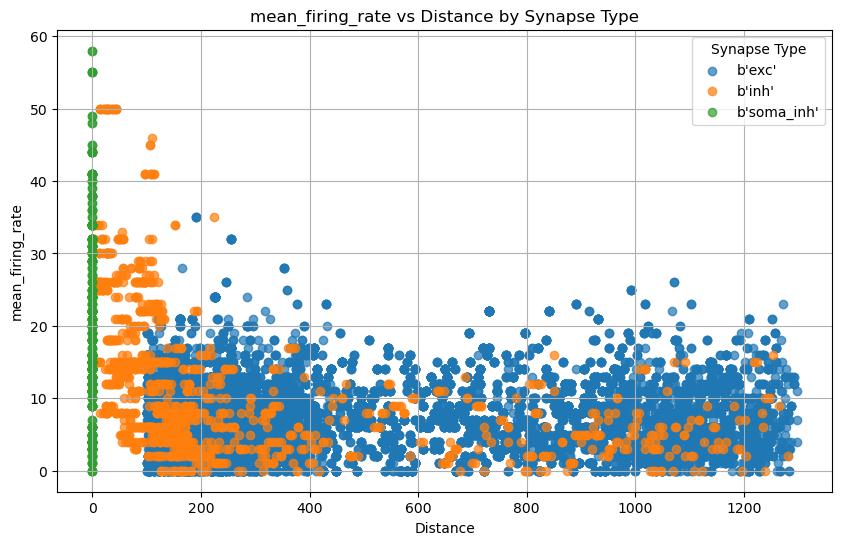

In [50]:
# plt.scatter(syn_data.Distance, syn_data.mean_firing_rate)

plot_by_group(x_var='Distance', y_var='mean_firing_rate', syn_data_grouped_by_type=syn_data_grouped_by_type)

weight as a function of Distance

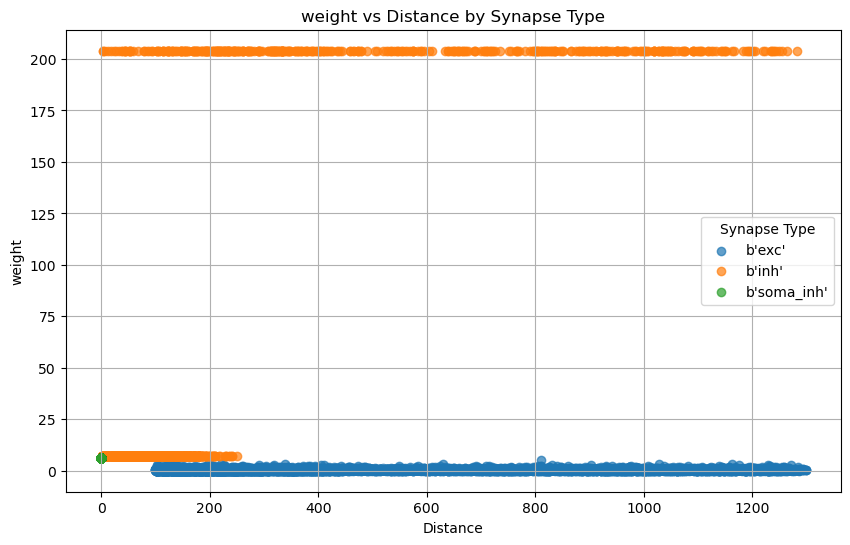

In [51]:
plot_by_group(x_var='Distance', y_var='weight', syn_data_grouped_by_type=syn_data_grouped_by_type)

plot firing rate as a function of transfer impedance

plot gmax as a function of transfer impedance?

plot cumulative in-path gmax as a function of transfer impedance?